# Basic Graph Representation with PyTorch and NetworkX

In [1]:
# !pip3 install torch torchvision torchaudio
# !pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.11.0+cpu.html
# !pip install torch_geometric

In [2]:
!pip list grep | torch

/bin/bash: torch: command not found
ERROR: Pipe to stdout was broken
Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='utf-8'>
BrokenPipeError: [Errno 32] Broken pipe


/home/jungyeon/anaconda3/envs/gnn/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jungyeon/anaconda3/envs/gnn/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
/tmp/ipykernel_827673/3766612090.py:26: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  edge_weight = torch.tensor([


Number of nodes:  4
Number of edges:  8
Number of features per node (Length of feature vector):  6 

Number of weights per edge (edge-features):  1 



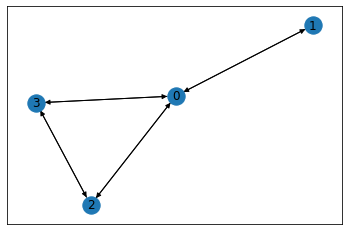

In [3]:
import torch
import torch_geometric
import torch_sparse
from torch_geometric.data import Data
import networkx as nx
from torch_geometric.utils.convert import to_networkx
" Define a graph "

# a graph with 4 nodes
edge_list = torch.tensor([
                         [0, 0, 0, 1, 2, 2, 3, 3], # Source Nodes
                         [1, 2, 3, 0, 0, 3, 2, 0]  # Target Nodes
                        ], dtype=torch.long)

# 6 Features for each node (4x6 - Number of nodes x NUmber of features)

node_features = torch.tensor([
                            [-8, 1, 5, 8, 2, -3], # Features of Node 0
                            [-1, 0, 2, -3, 0, 1], # Features of Node 1
                            [1, -1, 0, -1, 2, 1], # Features of Node 2
                            [0, 1, 4, -2, 3, 4], # Features of Node 3
                            ],dtype=torch.long)

# 1 Weight for each edge 

edge_weight = torch.tensor([
                            [35.], # Weight for nodes (0,1)
                            [48.], # Weight for nodes (0,2)
                            [12.], # Weight for nodes (0,3)
                            [10.], # Weight for nodes (1,0)
                            [70.], # Weight for nodes (2,0)
                            [5.], # Weight for nodes (2,3)
                            [15.], # Weight for nodes (3,2)
                            [8.], # Weight for nodes (3,0)   
                            ],dtype=torch.long)

# Make a data object to store graph informaiton 
data = Data(x=node_features, edge_index=edge_list, edge_attr=edge_weight)


" Print the graph info "
print("Number of nodes: ", data.num_nodes)
print("Number of edges: ",data.num_edges)
print("Number of features per node (Length of feature vector): ", data.num_node_features,"\n")
print("Number of weights per edge (edge-features): ", data.num_edge_features, "\n")




" Plot the graph "

G = to_networkx(data)
nx.draw_networkx(G)
